In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [ ]:
ticker = ["AAPL", "MSFT","AMZN","UNH", "JNJ","LLY","SPY", "XLK", "XLV"]
data = yf.download(ticker, start='2000-01-01', end='2023-12-01')["Close"]
data.head()

[*********************100%%**********************]  9 of 9 completed


AAPL      AMZN       JNJ      LLY      MSFT       SPY  \
Date                                                                    
2000-01-03  0.999442  4.468750  46.09375  65.5625  58.28125  145.4375   
2000-01-04  0.915179  4.096875  44.40625  63.5000  56.31250  139.7500   
2000-01-05  0.928571  3.487500  44.87500  64.3125  56.90625  140.0000   
2000-01-06  0.848214  3.278125  46.28125  66.1875  55.00000  137.7500   
2000-01-07  0.888393  3.478125  48.25000  71.0625  55.71875  145.7500   

                 UNH       XLK        XLV  
Date                                       
2000-01-03  6.718750  55.43750  30.296875  
2000-01-04  6.632813  52.62500  29.609375  
2000-01-05  6.617188  51.84375  29.343750  
2000-01-06  6.859375  50.12500  29.437500  
2000-01-07  7.664063  51.00000  29.796875

In [ ]:
data.describe()

AAPL         AMZN          JNJ          LLY         MSFT  \
count  6017.000000  6017.000000  6017.000000  6017.000000  6017.000000   
mean     35.334492    37.537064    91.899985    99.183103    78.037451   
std      50.310012    51.221854    40.797379    96.379315    87.433142   
min       0.234286     0.298500    34.250000    27.469999    15.150000   
25%       2.146786     2.261000    60.009998    52.480000    27.049999   
50%      14.395357    10.135000    67.599998    66.809998    32.689999   
75%      40.580002    58.417999   129.110001    86.389999    84.559998   
max     196.449997   186.570496   186.009995   619.130005   382.700012   

               SPY          UNH          XLK          XLV  
count  6017.000000  6017.000000  6017.000000  6017.000000  
mean    196.410529   134.113016    50.819410    58.113442  
std     104.740077   149.531636    42.784285    35.258414  
min      68.110001     5.953125    11.580000    21.879999  
25%     119.290001    30.920000    21.860001    30.125000  
50%     145.750000    55.000000    30.250000    36.189999  
75%     256.769989   215.479996    63.480000    82.089996  
max     477.709991   555.150024   185.449997   142.830002

In [ ]:
#Generating the correlation matrix of spy_data
correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          AAPL      AMZN       JNJ       LLY      MSFT       SPY       UNH  \
AAPL  1.000000  0.926504  0.887829  0.903921  0.985736  0.956950  0.971437   
AMZN  0.926504  1.000000  0.917885  0.750358  0.940877  0.953880  0.931508   
JNJ   0.887829  0.917885  1.000000  0.727376  0.869793  0.957433  0.941207   
LLY   0.903921  0.750358  0.727376  1.000000  0.909076  0.830222  0.879112   
MSFT  0.985736  0.940877  0.869793  0.909076  1.000000  0.954919  0.963734   
SPY   0.956950  0.953880  0.957433  0.830222  0.954919  1.000000  0.972769   
UNH   0.971437  0.931508  0.941207  0.879112  0.963734  0.972769  1.000000   
XLK   0.978395  0.946127  0.888543  0.888148  0.987505  0.975136  0.961064   
XLV   0.938256  0.937593  0.982183  0.804314  0.924477  0.986560  0.971190   

           XLK       XLV  
AAPL  0.978395  0.938256  
AMZN  0.946127  0.937593  
JNJ   0.888543  0.982183  
LLY   0.888148  0.804314  
MSFT  0.987505  0.924477  
SPY   0.975136  0.986560  
UNH   0.96

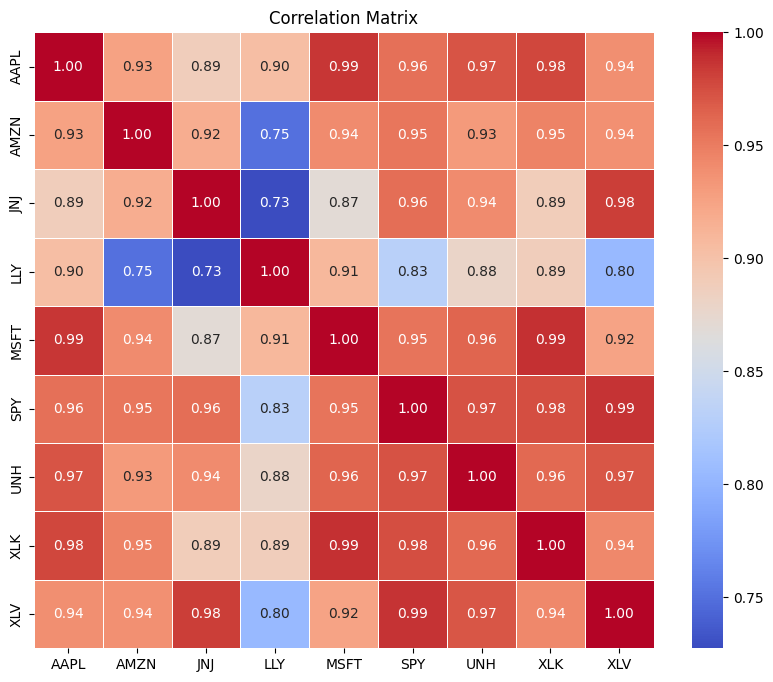

In [ ]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
tech = data[["AAPL", "MSFT","AMZN", "XLK", "SPY"]]
healthcare = data[["UNH", "JNJ", "LLY", "XLV", "SPY"]]

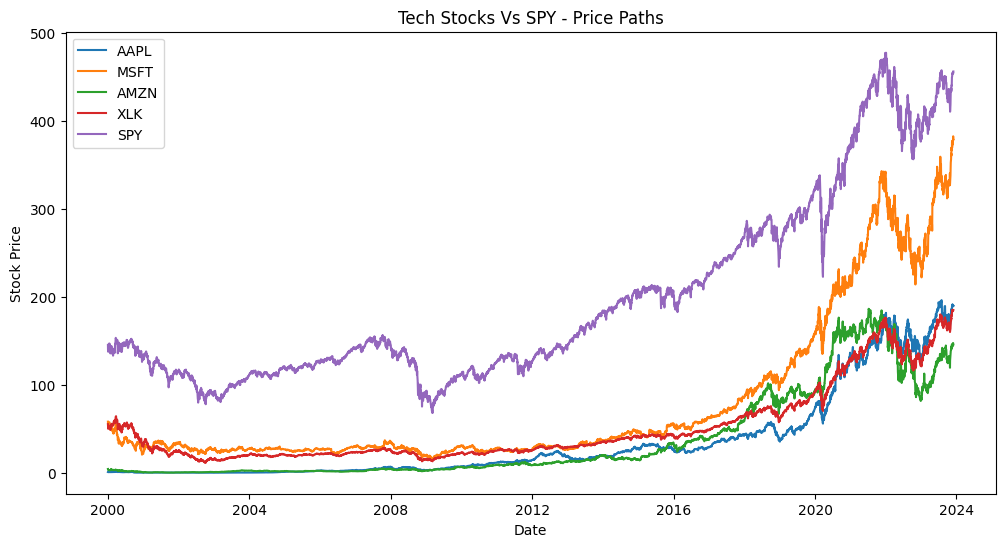

In [ ]:
# Plotting the price paths for tech stocks
plt.figure(figsize=(12, 6))
for column in tech.columns:
    plt.plot(tech.index, tech[column], label=column)

plt.title('Tech Stocks Vs SPY - Price Paths')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()



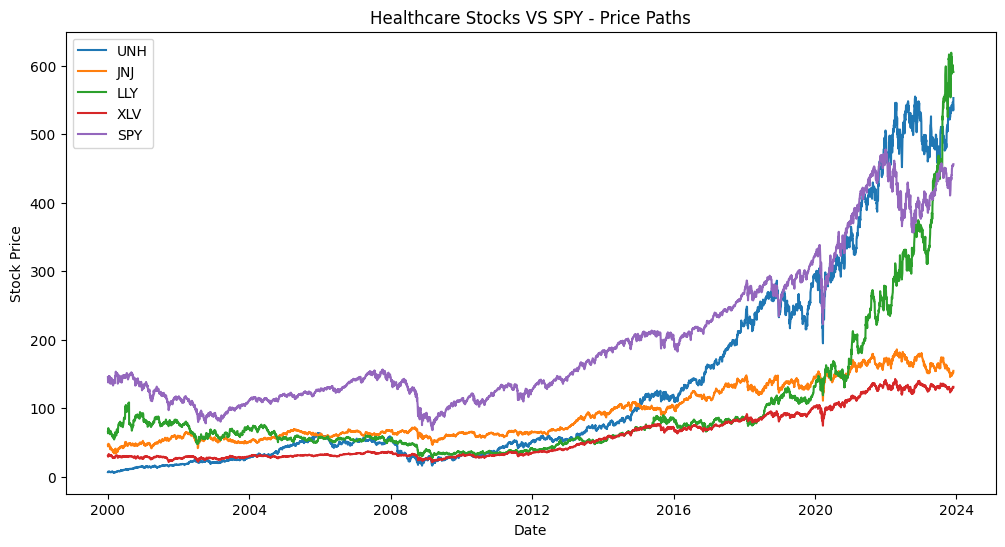

In [ ]:
# Plotting the price paths for healthcare stocks
plt.figure(figsize=(12, 6))
for column in healthcare.columns:
    plt.plot(healthcare.index, healthcare[column], label=column)

plt.title('Healthcare Stocks VS SPY - Price Paths')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Performance Metrics function
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, r2, mape

# Regression Model:

# Tech Sector

[*********************100%%**********************]  5 of 5 completed


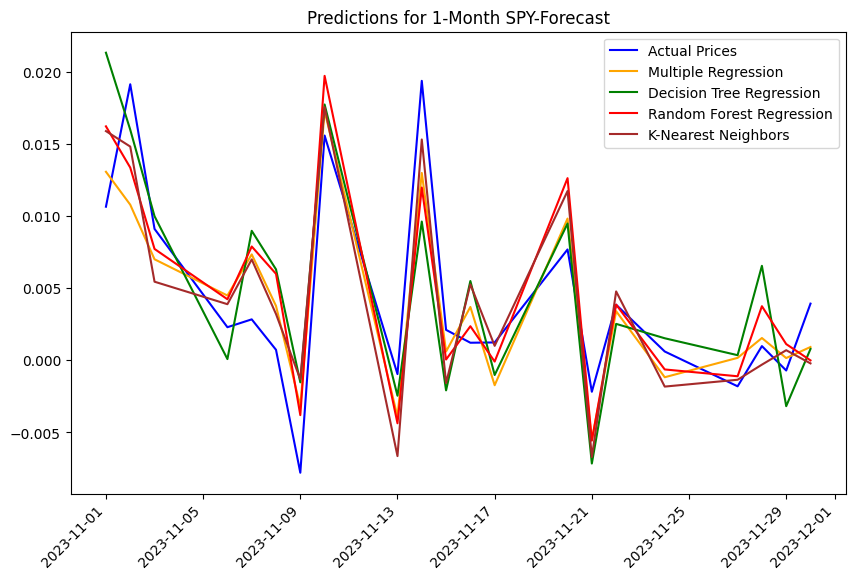


Overall Performance Metrics for 1-Month SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.002829  0.000011  0.003373   0.760470  120.681993
Decision Tree        0.003880  0.000022  0.004700   0.534828  180.164541
Random Forest        0.003207  0.000014  0.003749   0.704082  140.617547
K-NN                 0.003187  0.000013  0.003622   0.723769  145.045110



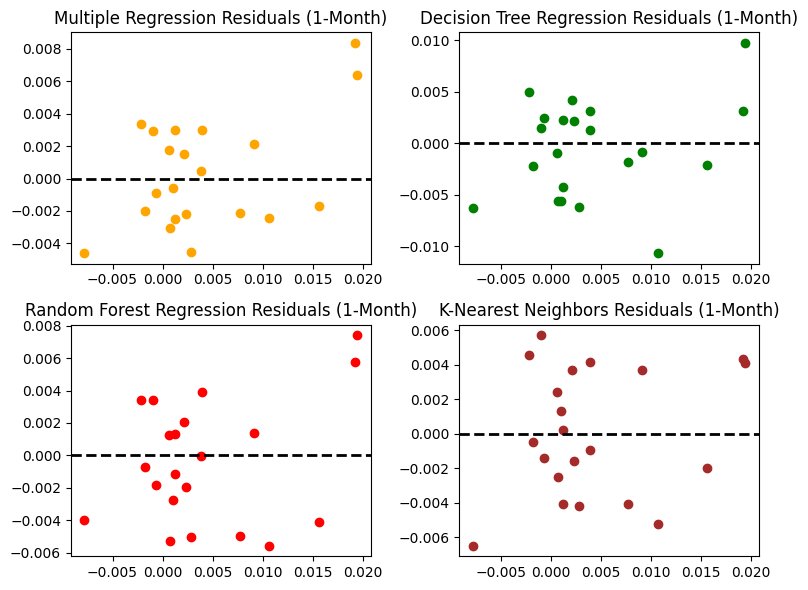


Residual Statistics for 1-Month SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000303          0.003442
Decision Tree            -0.000544          0.004784
Random Forest            -0.000354          0.003824
K-NN                      0.000059          0.003711



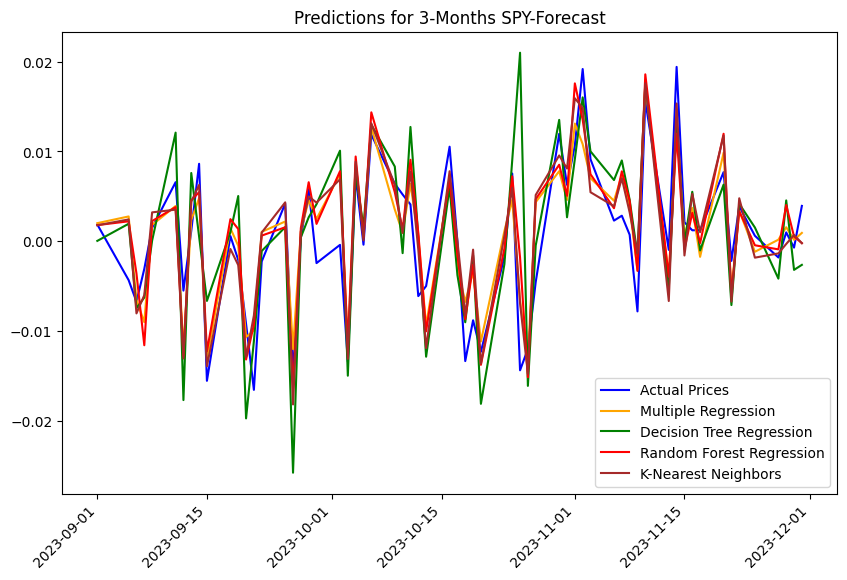


Overall Performance Metrics for 3-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.003137  0.000015  0.003843   0.774304  219.477829
Decision Tree        0.004700  0.000046  0.006764   0.300682  298.252994
Random Forest        0.003524  0.000019  0.004322   0.714525  184.241881
K-NN                 0.003216  0.000016  0.003998   0.755720  128.647520



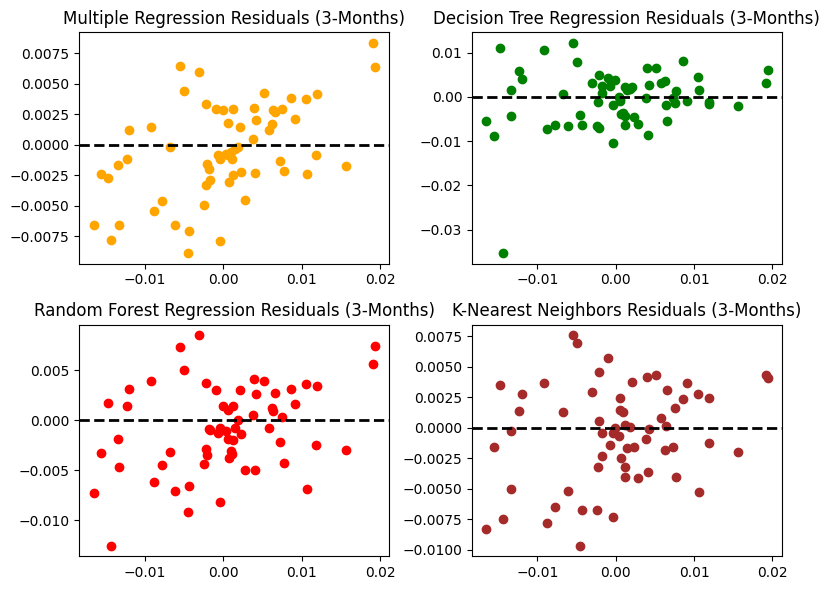


Residual Statistics for 3-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000451          0.003847
Decision Tree            -0.000559          0.006795
Random Forest            -0.000785          0.004284
K-NN                     -0.000568          0.003989



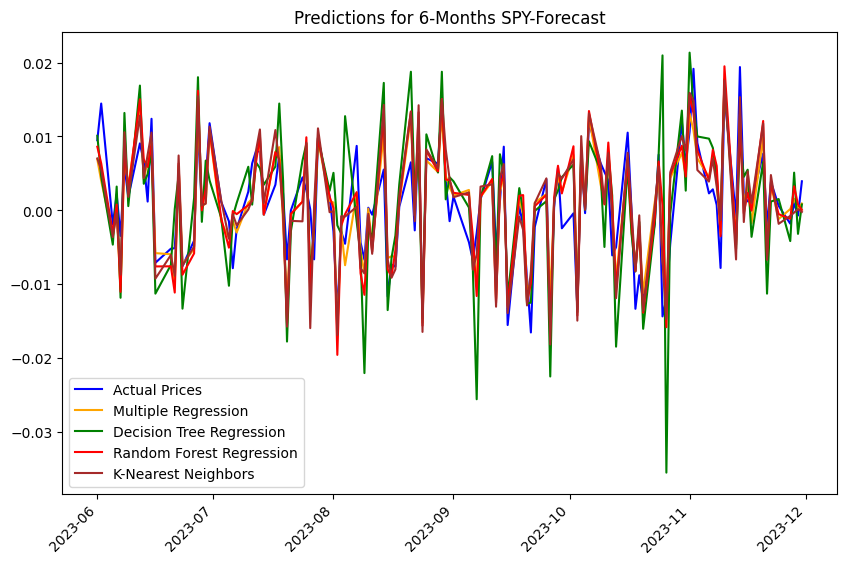


Overall Performance Metrics for 6-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.002932  0.000014  0.003732   0.748391   inf
Decision Tree        0.004939  0.000048  0.006953   0.126779   inf
Random Forest        0.003319  0.000018  0.004264   0.671566   inf
K-NN                 0.003326  0.000018  0.004258   0.672582   inf



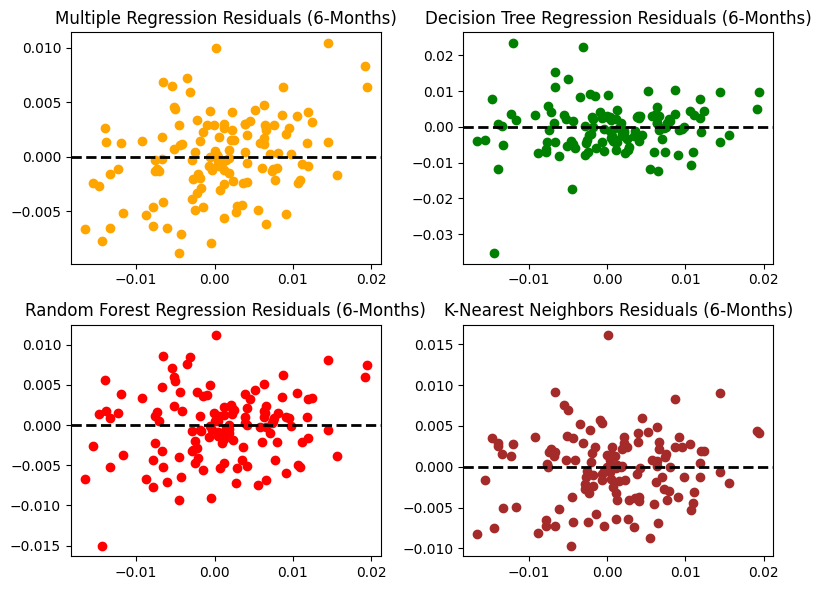


Residual Statistics for 6-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000003          0.003747
Decision Tree            -0.000261          0.006976
Random Forest            -0.000215          0.004276
K-NN                     -0.000223          0.004269



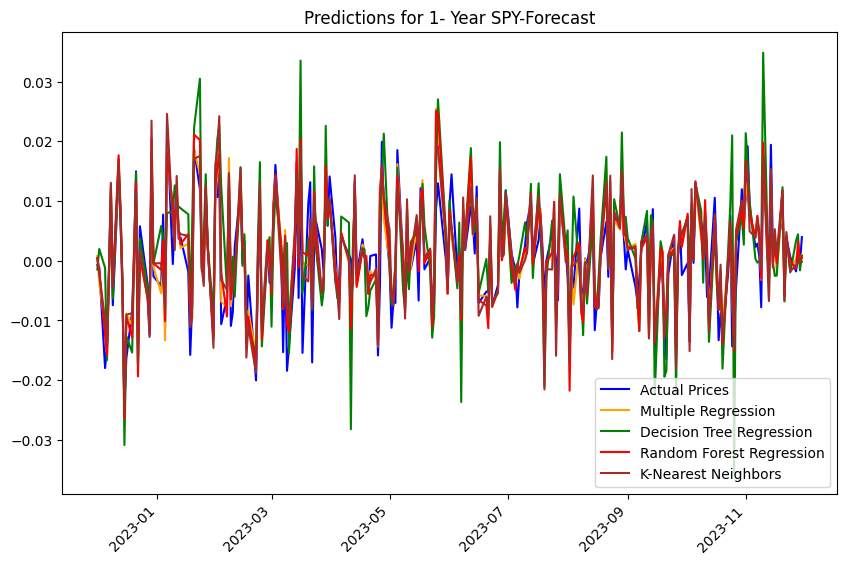


Overall Performance Metrics for 1- Year SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.003116  0.000017  0.004182   0.773524   inf
Decision Tree        0.005229  0.000051  0.007162   0.335816   inf
Random Forest        0.003395  0.000020  0.004505   0.737188   inf
K-NN                 0.003546  0.000021  0.004636   0.721675   inf



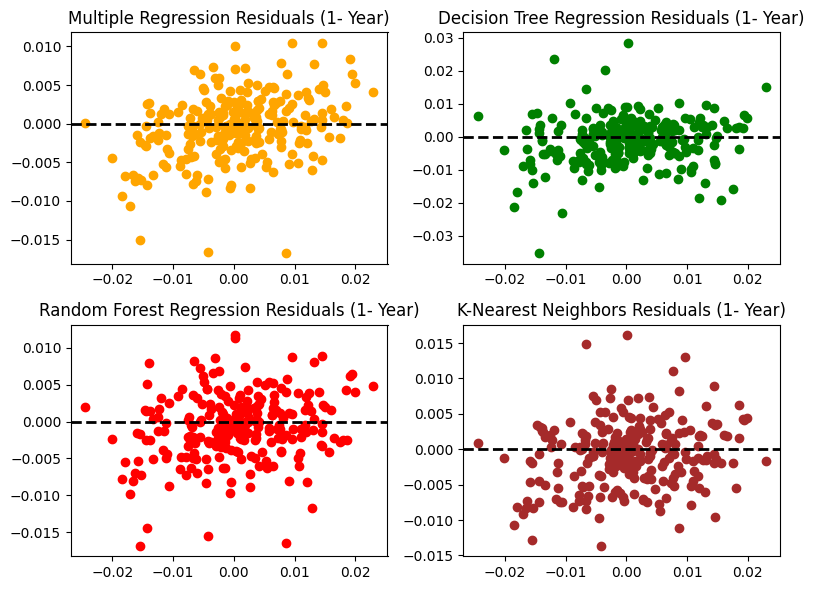


Residual Statistics for 1- Year SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000462          0.004165
Decision Tree            -0.001240          0.007068
Random Forest            -0.000722          0.004456
K-NN                     -0.000697          0.004593



In [ ]:
# Download historical data for SPY
tech = ["AAPL", "MSFT","AMZN","SPY", "XLK"]
tech_data = yf.download(tech, start='2000-01-01', end='2023-12-01')["Close"]
tech_data = tech_data.pct_change()
tech_data.dropna(inplace = True)
# spy_data.head()

features = ["AAPL", "MSFT", "AMZN", "XLK"]
X = tech_data[features]
y = tech_data['SPY']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} SPY-Forecast')
    plt.legend()


    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} SPY-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} SPY-Forecast:")
    print(f"{residual_stats}\n")


# Healthcare Sector

[*********************100%%**********************]  5 of 5 completed


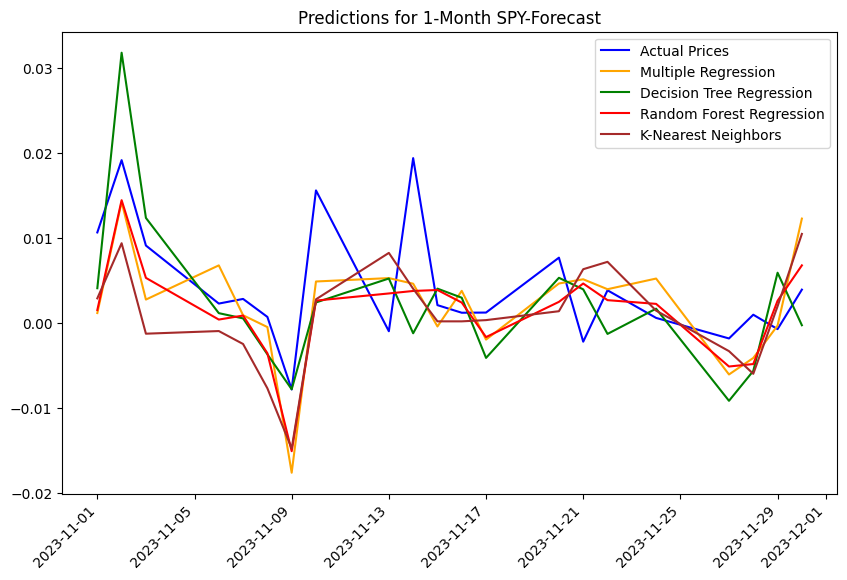


Overall Performance Metrics for 1-Month SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.005302  0.000041  0.006430   0.129360  203.413468
Decision Tree        0.005656  0.000054  0.007368  -0.143121  245.004626
Random Forest        0.004857  0.000037  0.006111   0.213769  191.257413
K-NN                 0.006172  0.000054  0.007351  -0.137821  247.703722



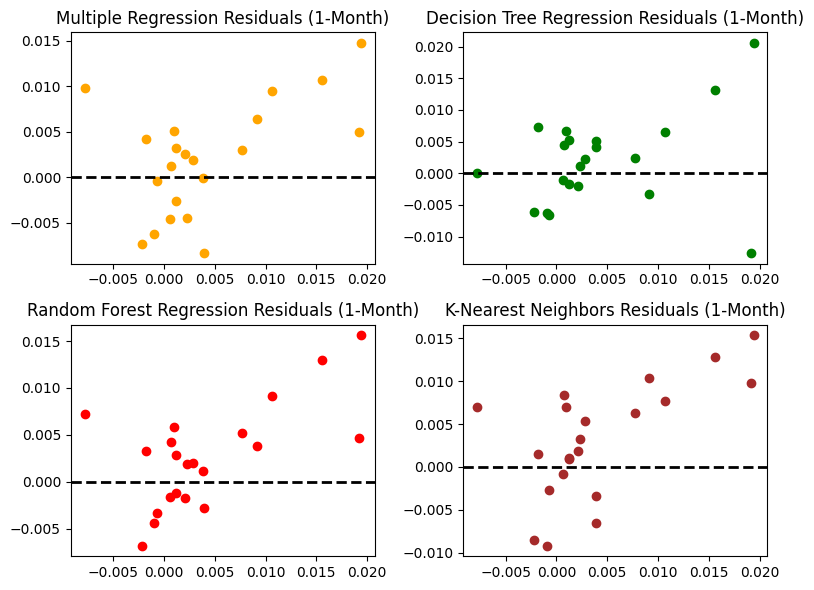


Residual Statistics for 1-Month SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.002047          0.006246
Decision Tree             0.001877          0.007301
Random Forest             0.002753          0.005590
K-NN                      0.003204          0.006780



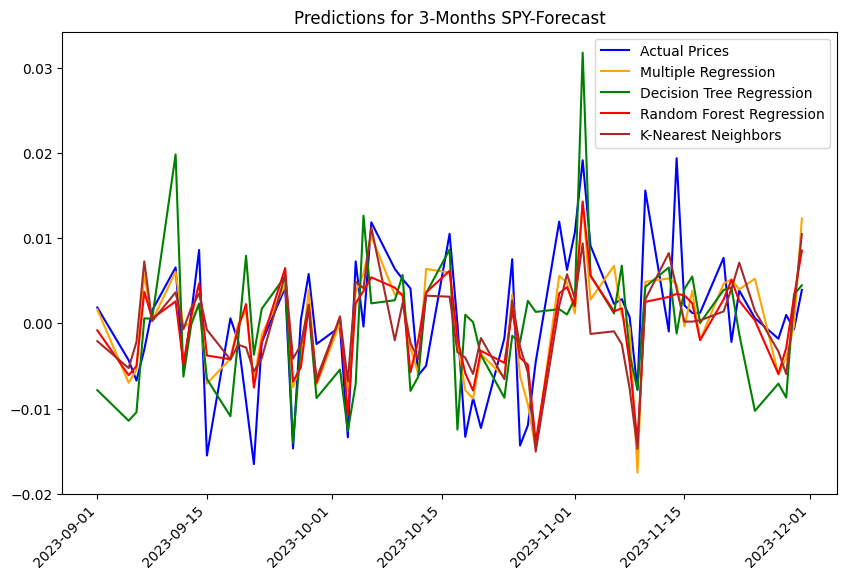


Overall Performance Metrics for 3-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.004651  0.000033  0.005768   0.491381  246.425017
Decision Tree        0.006678  0.000068  0.008249  -0.040091  720.765329
Random Forest        0.004771  0.000035  0.005903   0.467402  222.864009
K-NN                 0.005528  0.000045  0.006693   0.315206  296.628677



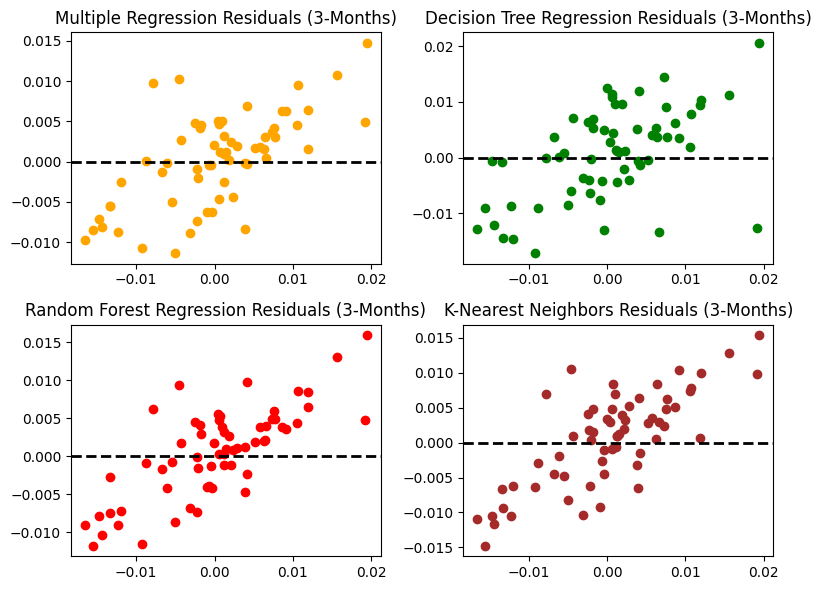


Residual Statistics for 3-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000299          0.005807
Decision Tree             0.000622          0.008292
Random Forest             0.000618          0.005918
K-NN                      0.000575          0.006722



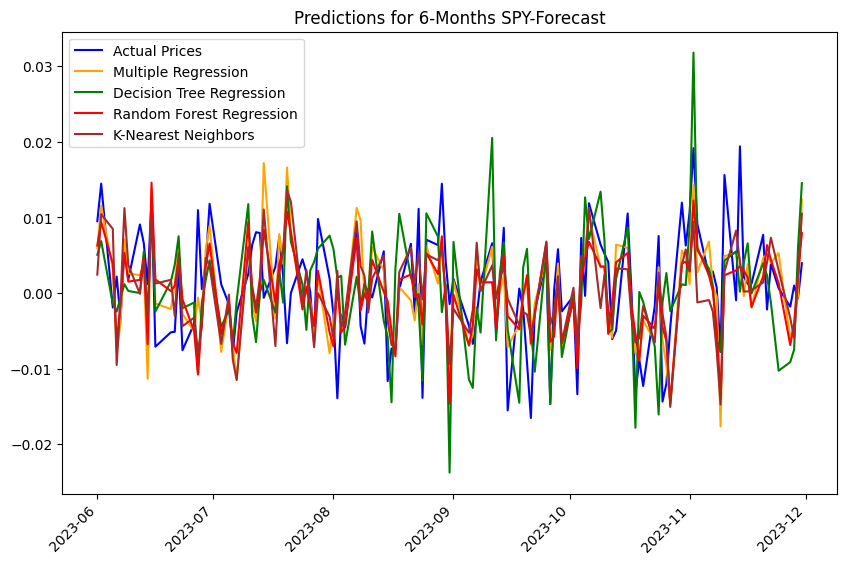


Overall Performance Metrics for 6-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.005013  0.000042  0.006492   0.238711   inf
Decision Tree        0.006496  0.000067  0.008197  -0.213562   inf
Random Forest        0.005117  0.000042  0.006443   0.250189   inf
K-NN                 0.005497  0.000047  0.006882   0.144542   inf



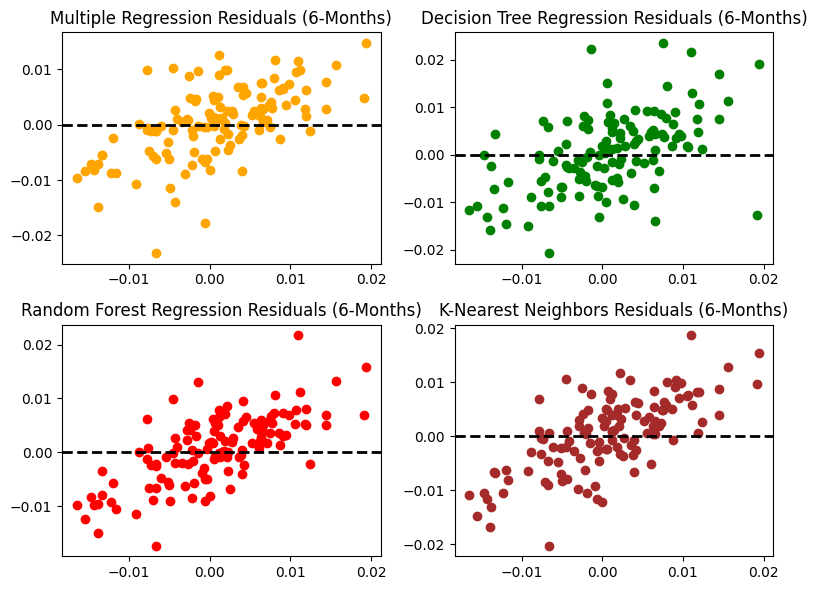


Residual Statistics for 6-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000454          0.006502
Decision Tree             0.000439          0.008217
Random Forest             0.000790          0.006420
K-NN                      0.000474          0.006893



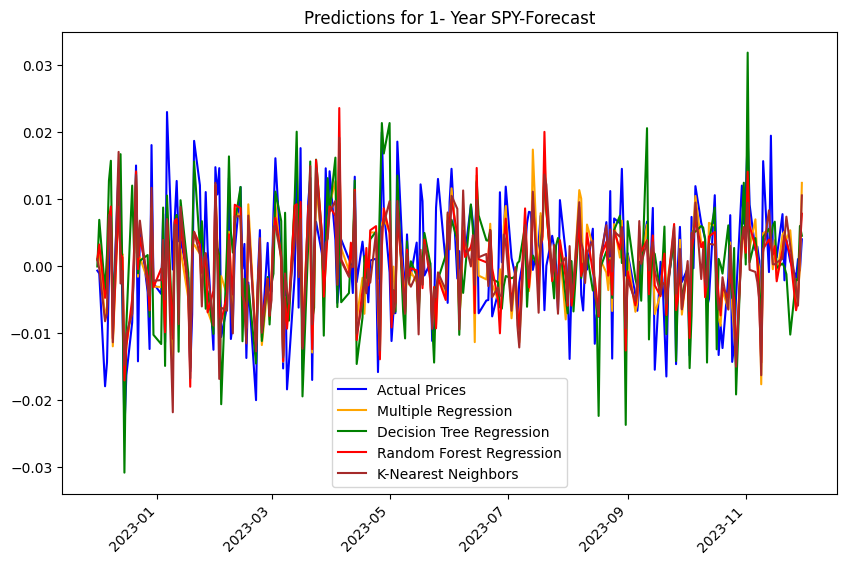


Overall Performance Metrics for 1- Year SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.005470  0.000049  0.006991   0.367065   inf
Decision Tree        0.006477  0.000065  0.008089   0.152747   inf
Random Forest        0.005530  0.000050  0.007106   0.346046   inf
K-NN                 0.005603  0.000053  0.007257   0.317961   inf



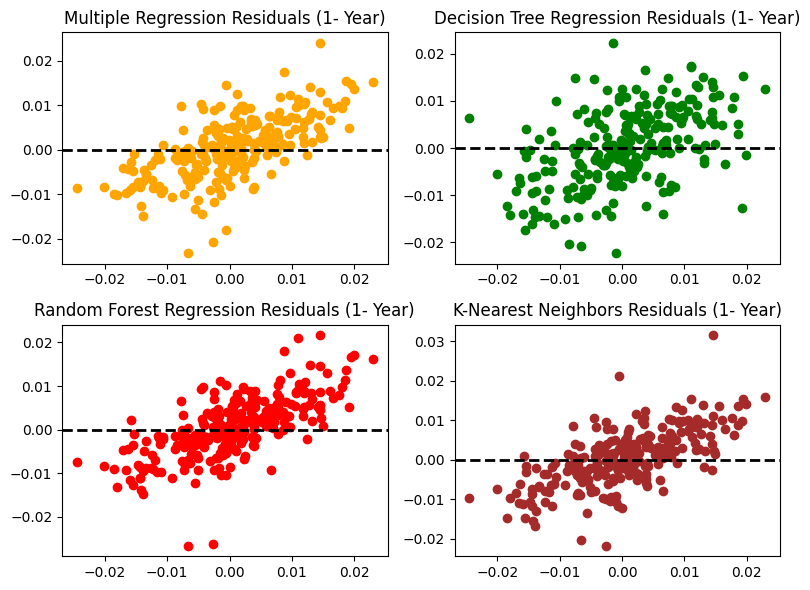


Residual Statistics for 1- Year SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000673          0.006973
Decision Tree             0.000107          0.008104
Random Forest             0.000649          0.007091
K-NN                      0.000672          0.007241



In [ ]:
# Download historical data for SPY
healthcare = ["UNH", "JNJ","LLY", "SPY", "XLV"]
# healthcare = ['UNH', 'JNJ', 'XLV']
healthcare_data = yf.download(healthcare, start='2000-01-01', end='2023-12-01')["Close"]
healthcare_data = healthcare_data.pct_change()
healthcare_data.dropna(inplace = True)
# spy_data.head()

features = ["UNH", "JNJ","LLY", "XLV"] #Original feature set


X = healthcare_data[features]
y = healthcare_data['SPY']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} SPY-Forecast')
    plt.legend()

    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} SPY-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} SPY-Forecast:")
    print(f"{residual_stats}\n")

# As you can see above the Tech sector has some decent performance metrics while for the Healthcare Sector the all the performance metrics are off.



# Now lets try to improve the results:

# 1) Recursive Feature Elimination

A) Tech Sector

[*********************100%%**********************]  5 of 5 completed


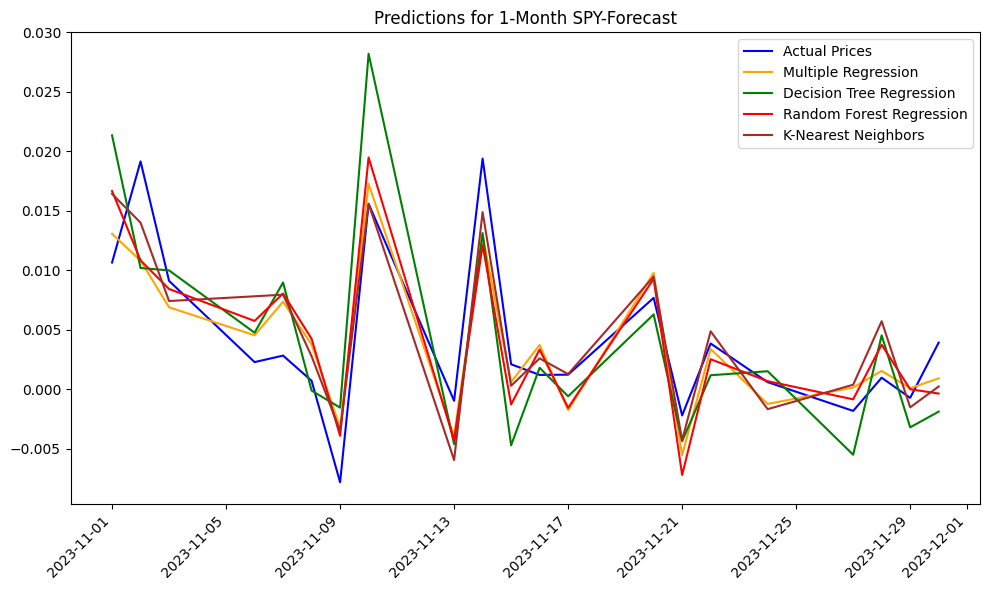


Overall Performance Metrics for 1-Month SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.002837  0.000011  0.003382   0.759192  121.041025
Decision Tree        0.004316  0.000030  0.005438   0.377264  146.859904
Random Forest        0.003365  0.000016  0.003976   0.667071  132.717000
K-NN                 0.002904  0.000012  0.003436   0.751364  139.436615



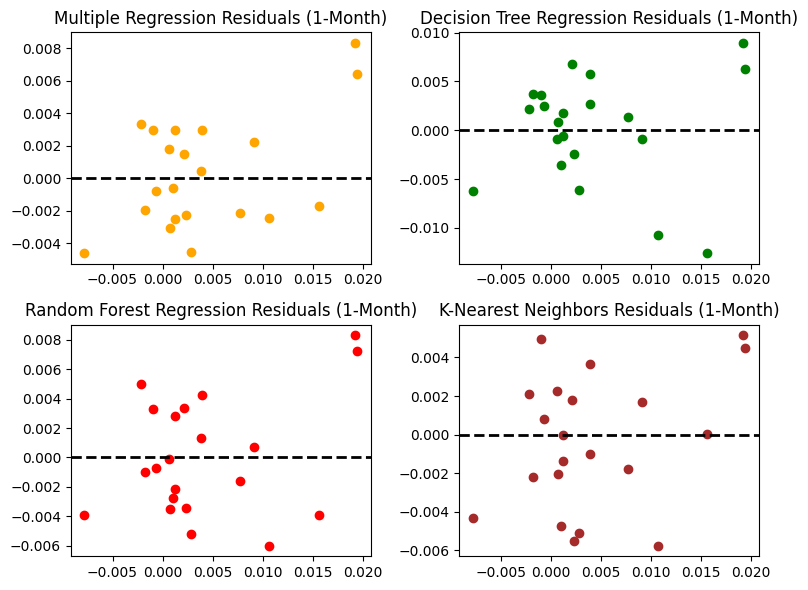


Residual Statistics for 1-Month SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000314          0.003450
Decision Tree             0.000113          0.005571
Random Forest             0.000097          0.004073
K-NN                     -0.000334          0.003505



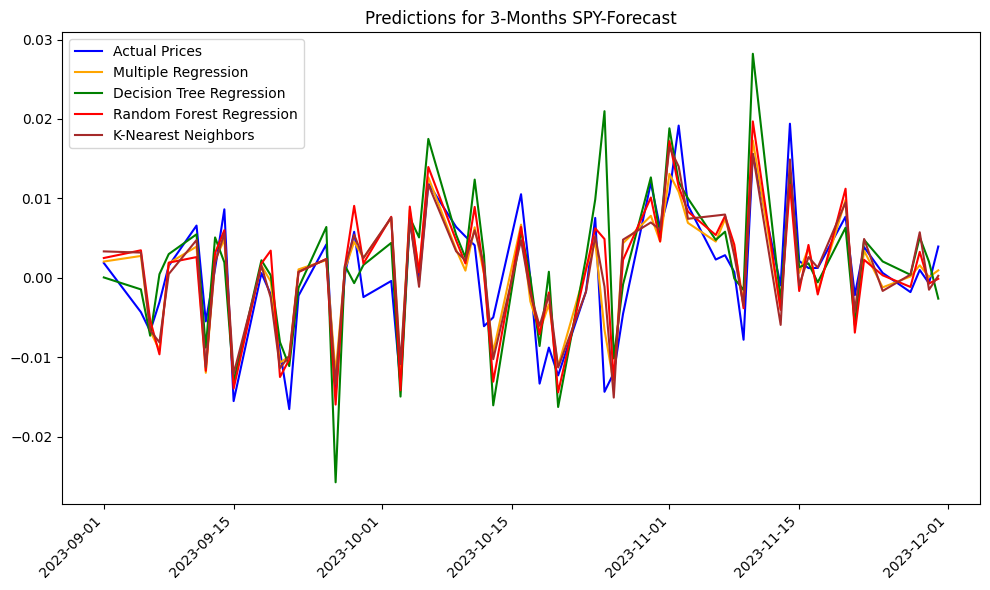


Overall Performance Metrics for 3-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.003147  0.000015  0.003855   0.772851  220.891177
Decision Tree        0.004158  0.000041  0.006434   0.367164  144.838748
Random Forest        0.003654  0.000022  0.004724   0.658923  185.342900
K-NN                 0.003222  0.000018  0.004189   0.731805  189.824666



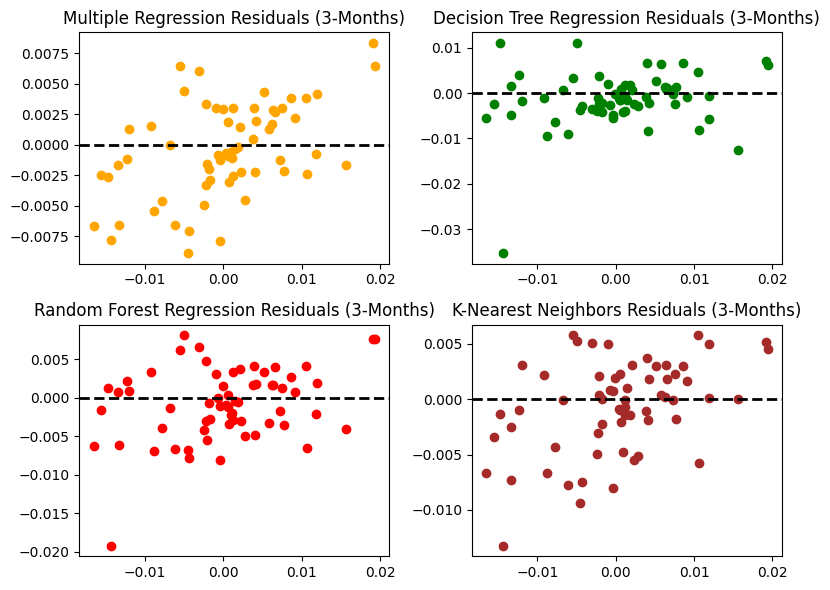


Residual Statistics for 3-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000442          0.003860
Decision Tree            -0.001375          0.006336
Random Forest            -0.000787          0.004695
K-NN                     -0.000672          0.004168



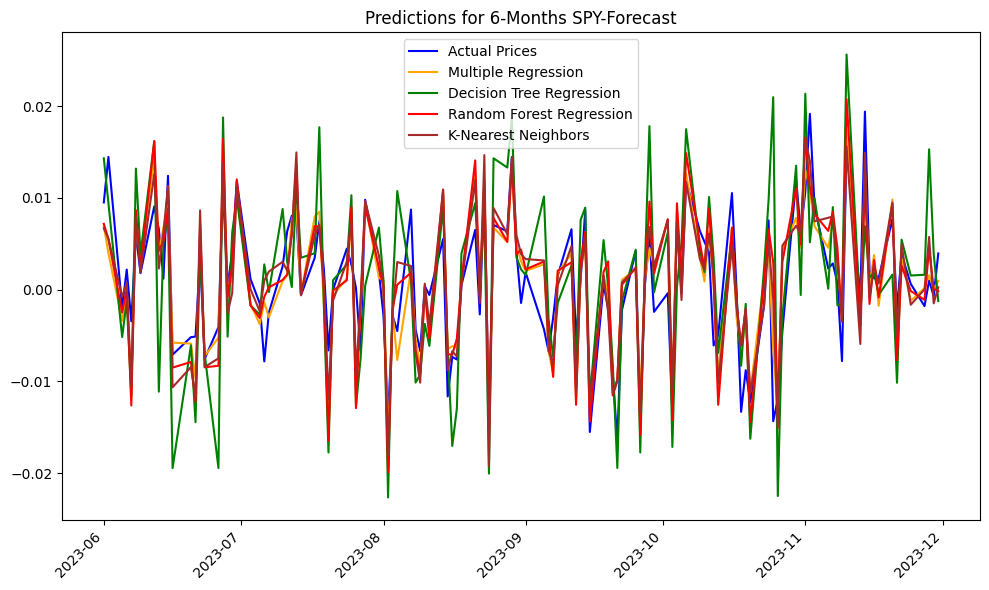


Overall Performance Metrics for 6-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.002936  0.000014  0.003735   0.748056   inf
Decision Tree        0.005322  0.000050  0.007044   0.103796   inf
Random Forest        0.003456  0.000020  0.004485   0.636594   inf
K-NN                 0.003180  0.000017  0.004075   0.699990   inf



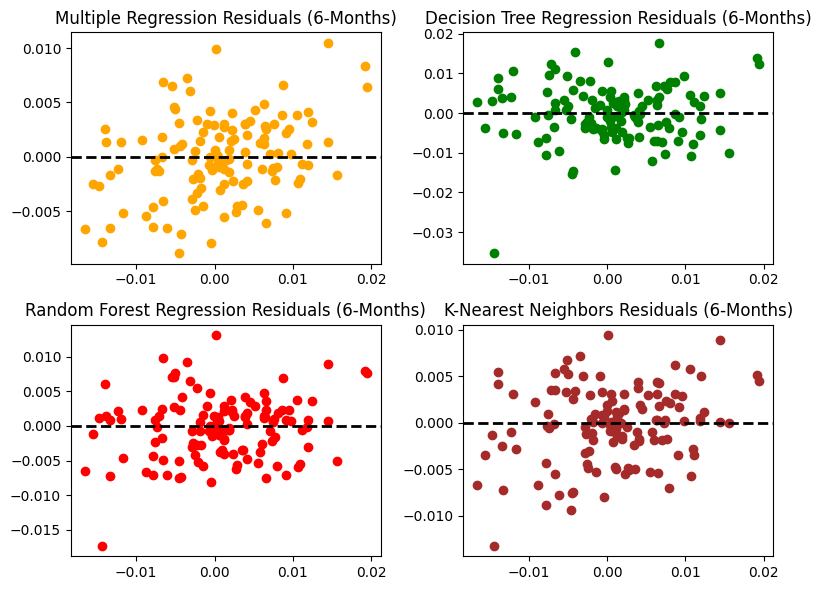


Residual Statistics for 6-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000012          0.003750
Decision Tree            -0.000246          0.007068
Random Forest            -0.000265          0.004495
K-NN                     -0.000258          0.004083



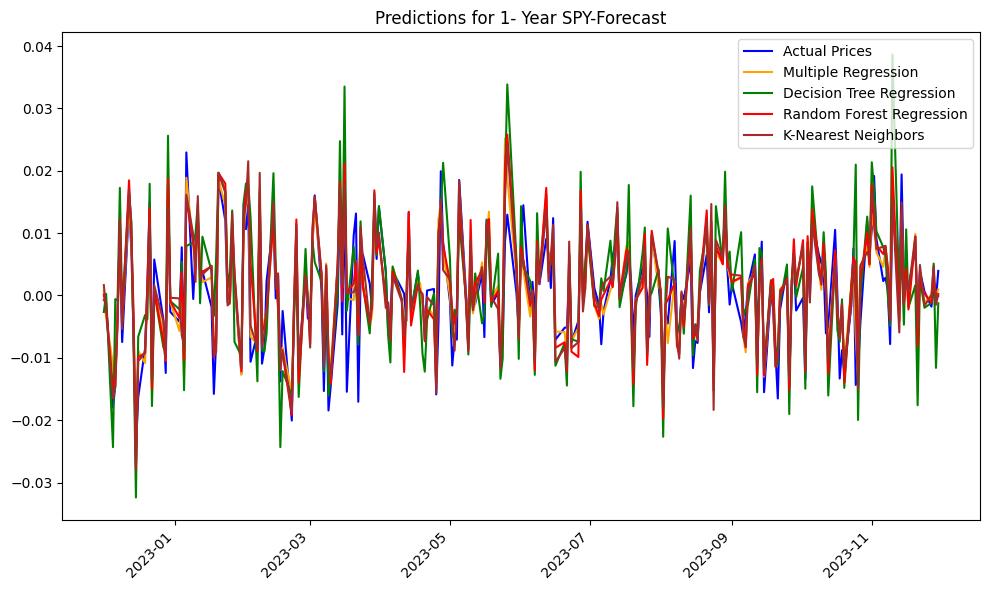


Overall Performance Metrics for 1- Year SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.003116  0.000017  0.004174   0.774349   inf
Decision Tree        0.005018  0.000046  0.006754   0.409222   inf
Random Forest        0.003513  0.000022  0.004692   0.714882   inf
K-NN                 0.003370  0.000020  0.004428   0.746087   inf



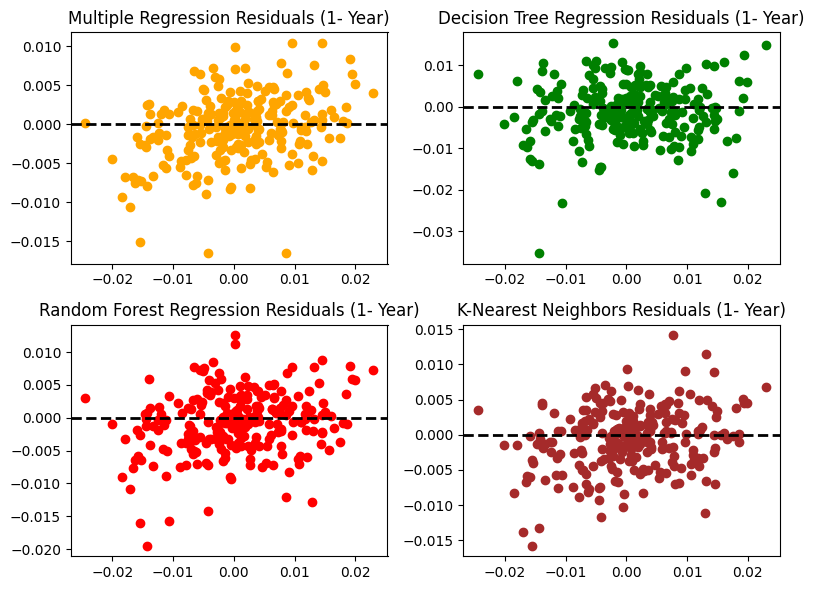


Residual Statistics for 1- Year SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000454          0.004158
Decision Tree            -0.001048          0.006686
Random Forest            -0.000776          0.004637
K-NN                     -0.000615          0.004394



In [ ]:
# Download historical data for SPY
tech = ["AAPL", "MSFT","AMZN","SPY", "XLK"]
tech_data = yf.download(tech, start='2000-01-01', end='2023-12-01')["Close"]
tech_data = tech_data.pct_change()
tech_data.dropna(inplace = True)
# spy_data.head()

features = ["AAPL", "MSFT", "AMZN", "XLK"]
X = tech_data[features]
y = tech_data['SPY']

# Recursion Feature Elimination Method
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_].tolist()
selected_features_rfe


features = selected_features_rfe
#features = ["UNH", "JNJ","LLY", "XLV"]
X = tech_data[features]
y = tech_data['SPY']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(10, 6))


    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} SPY-Forecast')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} SPY-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} SPY-Forecast:")
    print(f"{residual_stats}\n")


#B) Healthcare Sector

[*********************100%%**********************]  5 of 5 completed


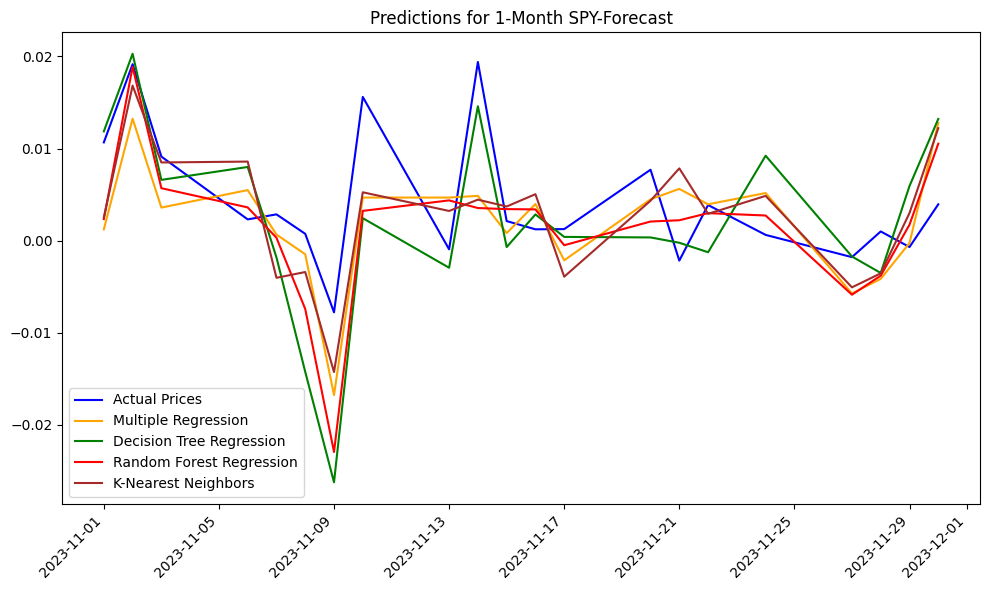


Overall Performance Metrics for 1-Month SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.005241  0.000041  0.006368   0.146252  203.580154
Decision Tree        0.005594  0.000055  0.007400  -0.153014  321.310876
Random Forest        0.005188  0.000046  0.006812   0.022932  215.970037
K-NN                 0.005399  0.000041  0.006381   0.142572  249.479883



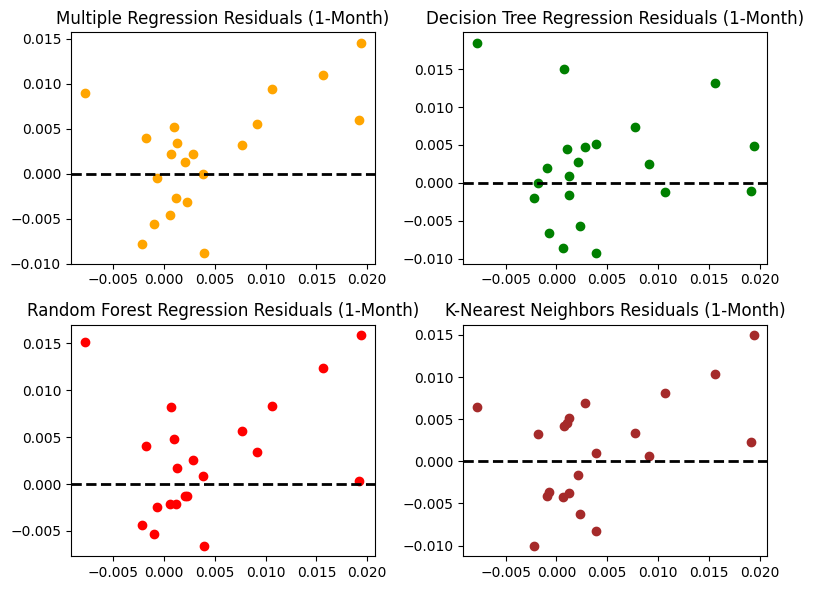


Residual Statistics for 1-Month SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.002075          0.006169
Decision Tree             0.002151          0.007255
Random Forest             0.002751          0.006386
K-NN                      0.001391          0.006382



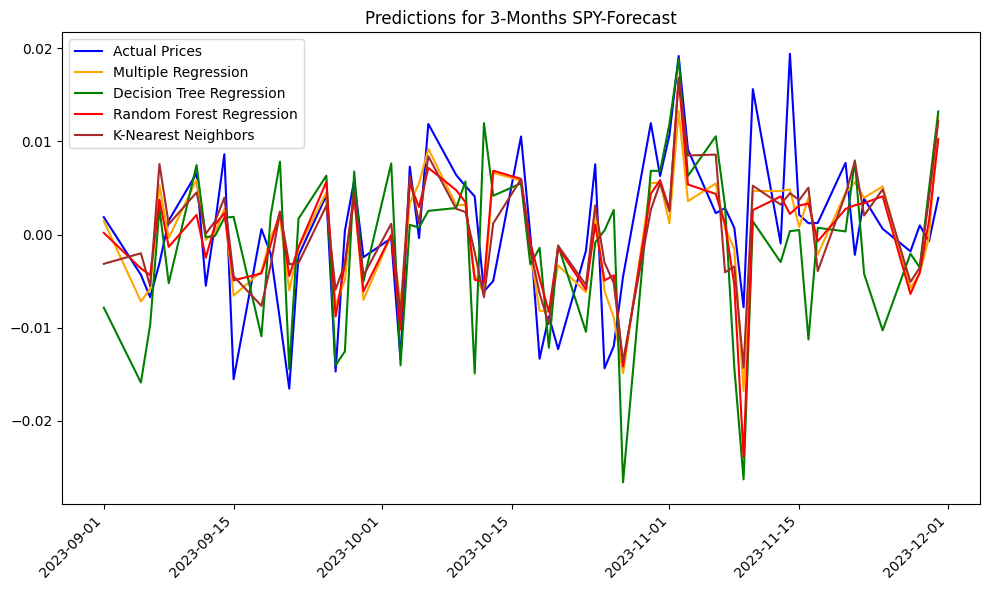


Overall Performance Metrics for 3-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.004717  0.000034  0.005845   0.477820  236.513738
Decision Tree        0.007351  0.000088  0.009396  -0.349526  446.338684
Random Forest        0.004882  0.000040  0.006301   0.393065  189.817775
K-NN                 0.004954  0.000038  0.006143   0.423168  235.043929



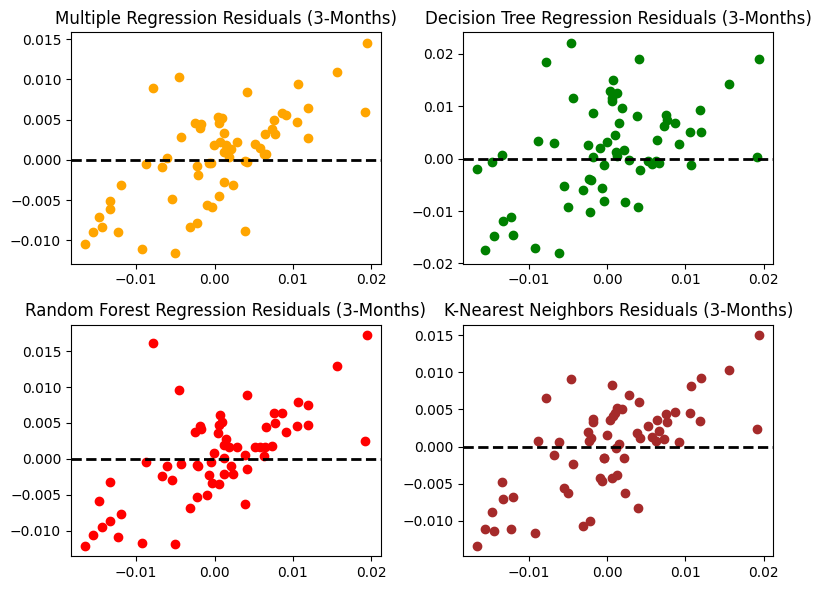


Residual Statistics for 3-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000337          0.005882
Decision Tree             0.001481          0.009353
Random Forest             0.000413          0.006338
K-NN                     -0.000065          0.006192



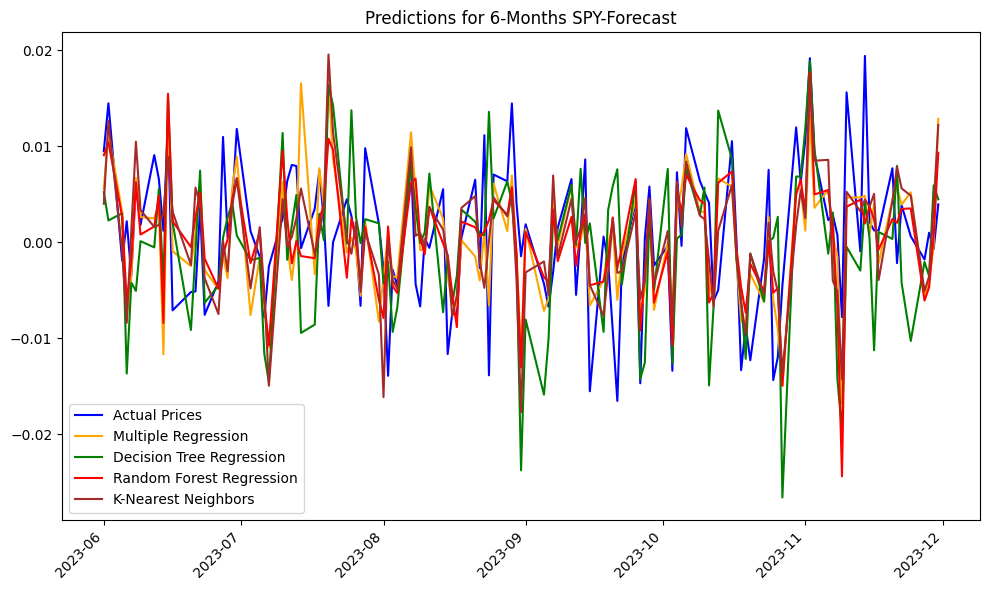


Overall Performance Metrics for 6-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.004996  0.000042  0.006472   0.243465   inf
Decision Tree        0.006757  0.000081  0.008973  -0.454232   inf
Random Forest        0.005067  0.000043  0.006537   0.228130   inf
K-NN                 0.005385  0.000047  0.006889   0.142864   inf



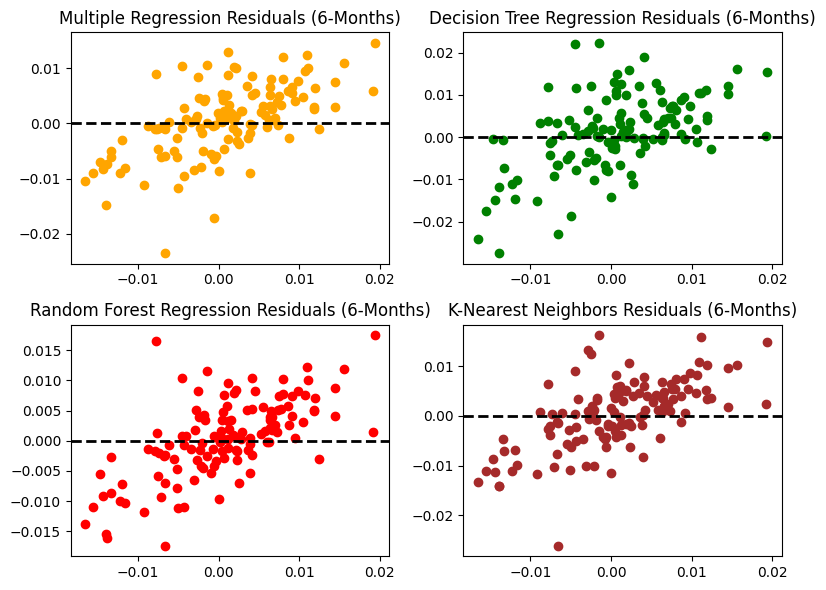


Residual Statistics for 6-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000529          0.006476
Decision Tree             0.001130          0.008937
Random Forest             0.000469          0.006546
K-NN                      0.000354          0.006907



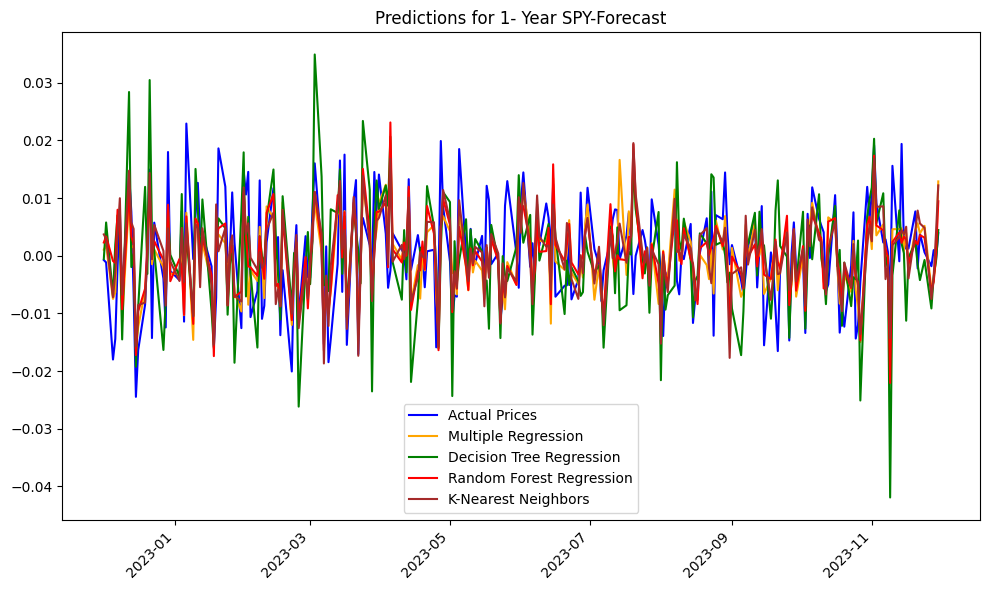


Overall Performance Metrics for 1- Year SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.005421  0.000048  0.006925   0.378905   inf
Decision Tree        0.007886  0.000101  0.010046  -0.306852   inf
Random Forest        0.005563  0.000052  0.007179   0.332507   inf
K-NN                 0.005659  0.000052  0.007240   0.321294   inf



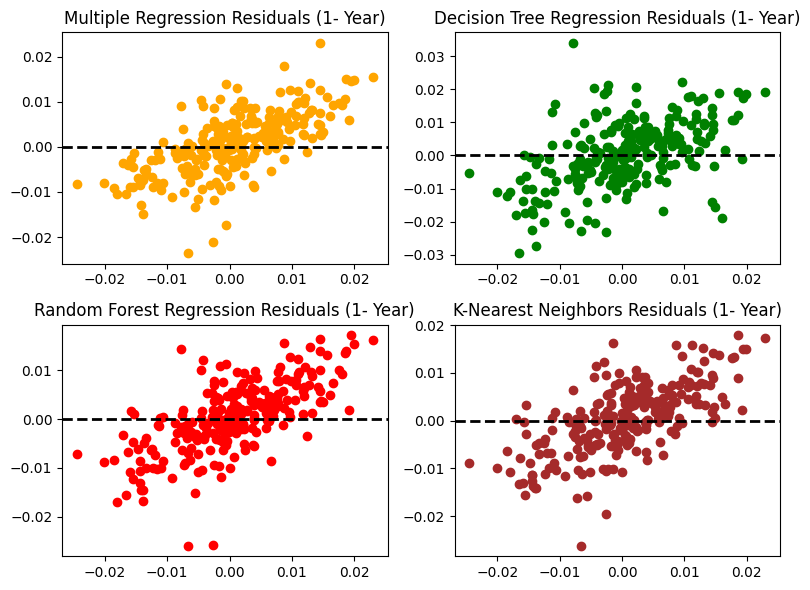


Residual Statistics for 1- Year SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000748          0.006899
Decision Tree             0.000485          0.010054
Random Forest             0.000420          0.007181
K-NN                      0.000360          0.007245



In [ ]:
# Download historical data for SPY
healthcare = ["UNH", "JNJ","LLY", "SPY", "XLV"]

healthcare_data = yf.download(healthcare, start='2000-01-01', end='2023-12-01')["Close"]
healthcare_data = healthcare_data.pct_change()
healthcare_data.dropna(inplace = True)
features = ["UNH", "JNJ","LLY", "XLV"]
X = healthcare_data[features]
y = healthcare_data["SPY"]
# spy_data.head()

# Recursion Feature Elimination Method
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_].tolist()
selected_features_rfe


features = selected_features_rfe
#features = ["UNH", "JNJ","LLY", "XLV"]
X = healthcare_data[features]
y = healthcare_data['SPY']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(10, 6))


    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} SPY-Forecast')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} SPY-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} SPY-Forecast:")
    print(f"{residual_stats}\n")

# 2) Principal Component Analysis (PCA)

A) Tech Sector

[*********************100%%**********************]  5 of 5 completed


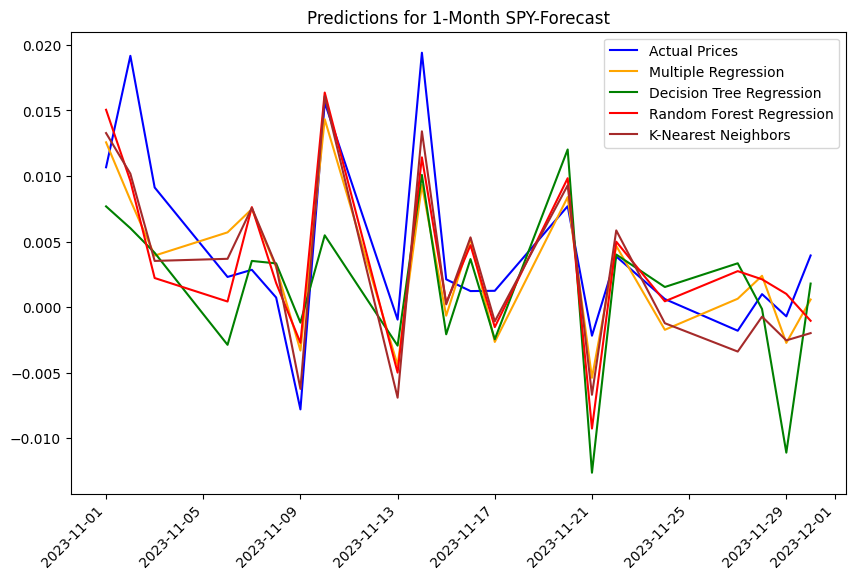


Overall Performance Metrics for 1-Month SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.003556  0.000019  0.004388   0.594556  153.226888
Decision Tree        0.004885  0.000037  0.006110   0.213911  213.184795
Random Forest        0.003684  0.000020  0.004475   0.578320  135.273080
K-NN                 0.003288  0.000015  0.003922   0.676118  153.908882



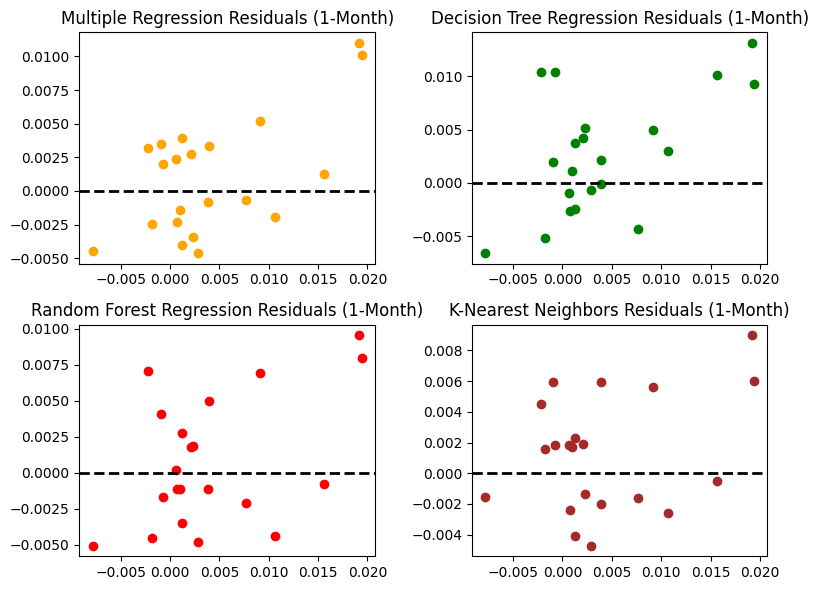


Residual Statistics for 1-Month SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.001076          0.004359
Decision Tree             0.002707          0.005613
Random Forest             0.000804          0.004511
K-NN                      0.001301          0.003791



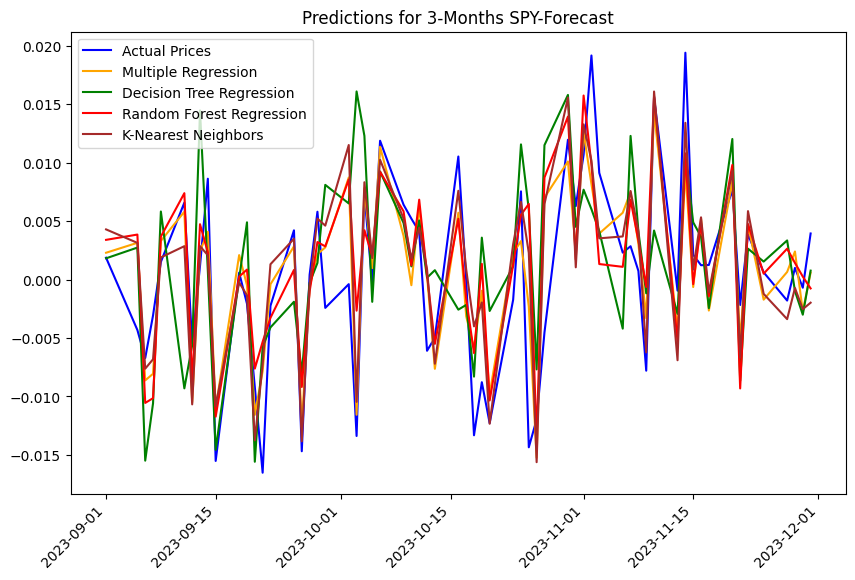


Overall Performance Metrics for 3-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.003746  0.000022  0.004671   0.666502  251.063420
Decision Tree        0.006095  0.000065  0.008045   0.010773  256.253046
Random Forest        0.004300  0.000032  0.005661   0.510077  204.185567
K-NN                 0.003728  0.000024  0.004924   0.629416  191.339462



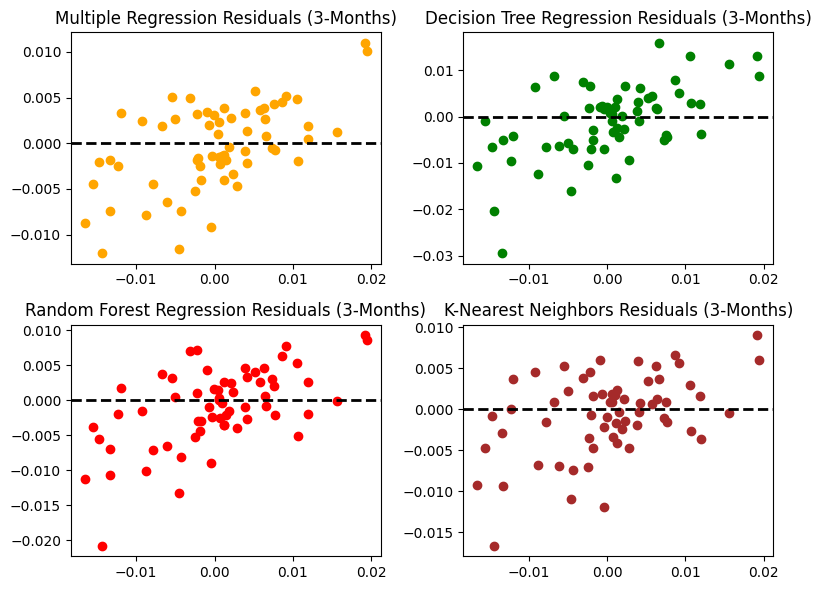


Residual Statistics for 3-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000354          0.004695
Decision Tree            -0.001153          0.008026
Random Forest            -0.001006          0.005616
K-NN                     -0.000663          0.004918



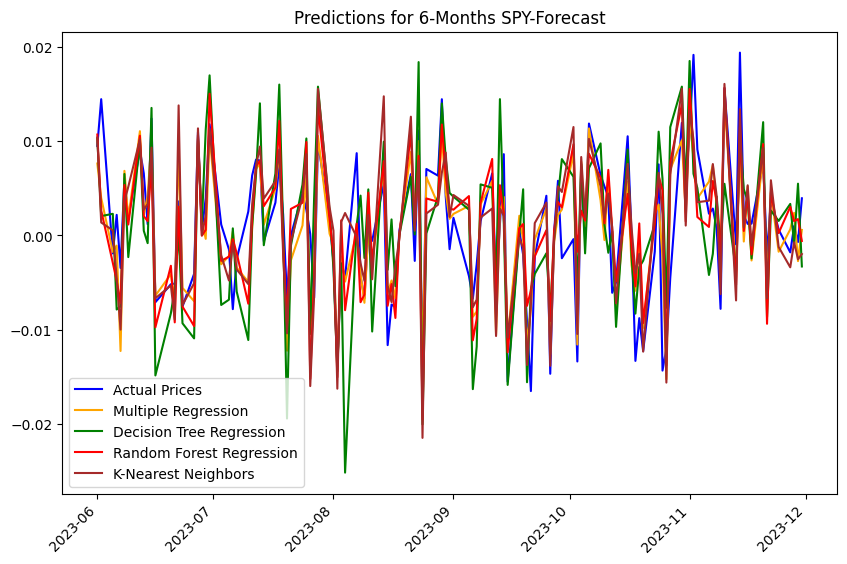


Overall Performance Metrics for 6-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.003177  0.000017  0.004175   0.685153   inf
Decision Tree        0.005153  0.000043  0.006524   0.231249   inf
Random Forest        0.003722  0.000025  0.004959   0.555737   inf
K-NN                 0.003729  0.000024  0.004921   0.562661   inf



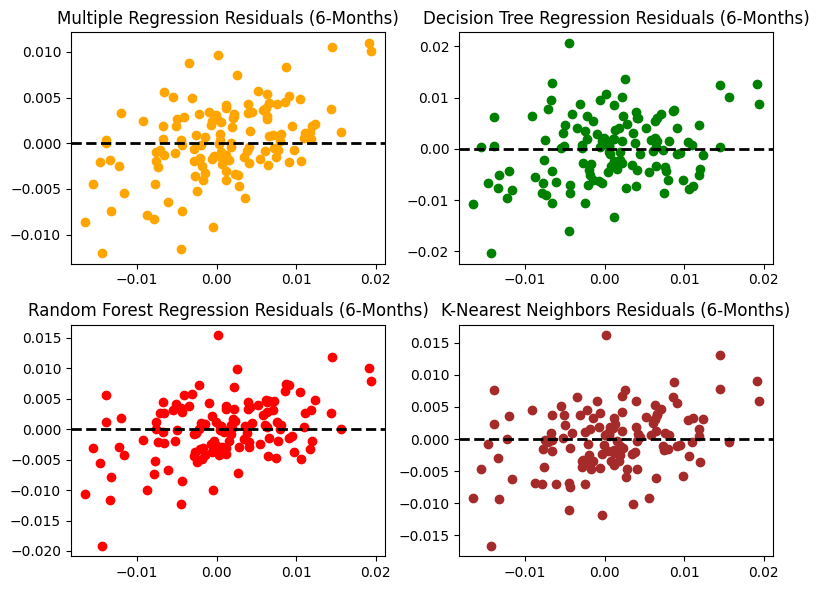


Residual Statistics for 6-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000229          0.004185
Decision Tree            -0.000046          0.006550
Random Forest            -0.000104          0.004978
K-NN                     -0.000156          0.004938



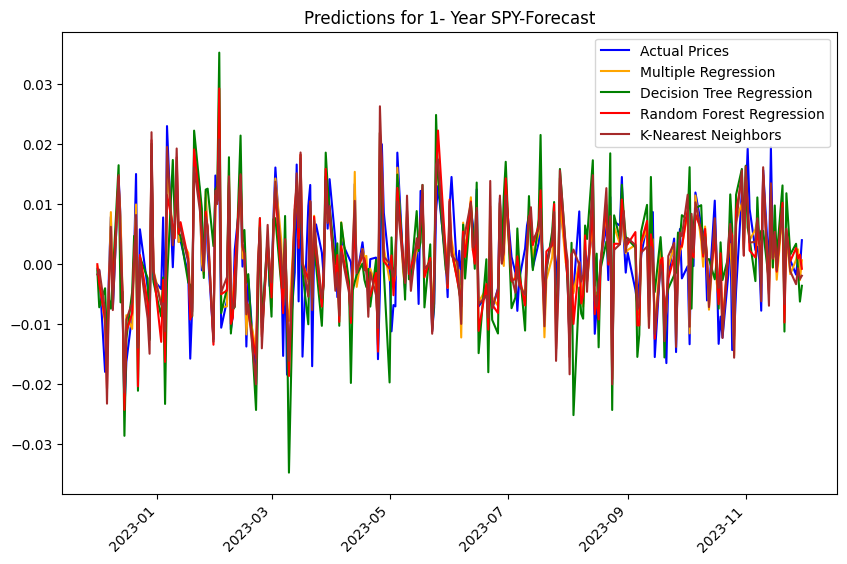


Overall Performance Metrics for 1- Year SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.003381  0.000021  0.004622   0.723359   inf
Decision Tree        0.006043  0.000065  0.008075   0.155504   inf
Random Forest        0.003955  0.000029  0.005383   0.624715   inf
K-NN                 0.003988  0.000030  0.005454   0.614741   inf



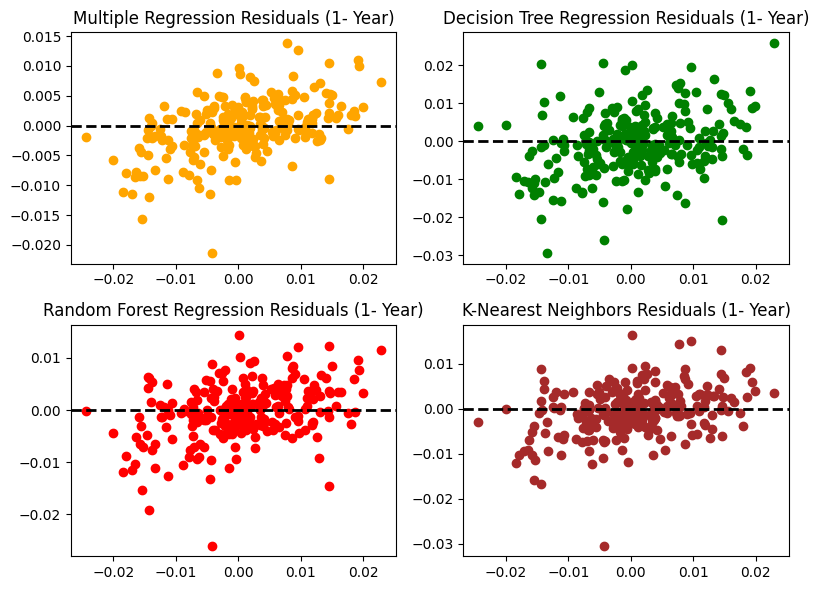


Residual Statistics for 1- Year SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000250          0.004624
Decision Tree            -0.000426          0.008080
Random Forest            -0.000268          0.005387
K-NN                     -0.000483          0.005444



In [ ]:
tech = ["AAPL", "MSFT","AMZN","SPY", "XLK"]
tech_data = yf.download(tech, start='2000-01-01', end='2023-12-01')["Close"]
tech_data = tech_data.pct_change()
tech_data.dropna(inplace = True)

# Assuming X is your feature matrix
features = ["AAPL", "MSFT", "AMZN", "XLK"]
X = tech_data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Choose based on the plot or a threshold
num_components = 2
X_selected_pca = pd.DataFrame(X_pca[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])

X_selected_pca['Date'] = healthcare_data.index

# Set the 'Date' column as the index
X_selected_pca.set_index('Date', inplace=True)

X_selected_pca['SPY'] = healthcare_data["SPY"]


features = ["PC1", "PC2"]
X = X_selected_pca[features]
y = X_selected_pca['SPY']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    X_train_scaled = X_train
    X_test_scaled = X_test


    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} SPY-Forecast')
    plt.legend()


    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} SPY-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} SPY-Forecast:")
    print(f"{residual_stats}\n")

B) Healthcare Sector

[*********************100%%**********************]  5 of 5 completed


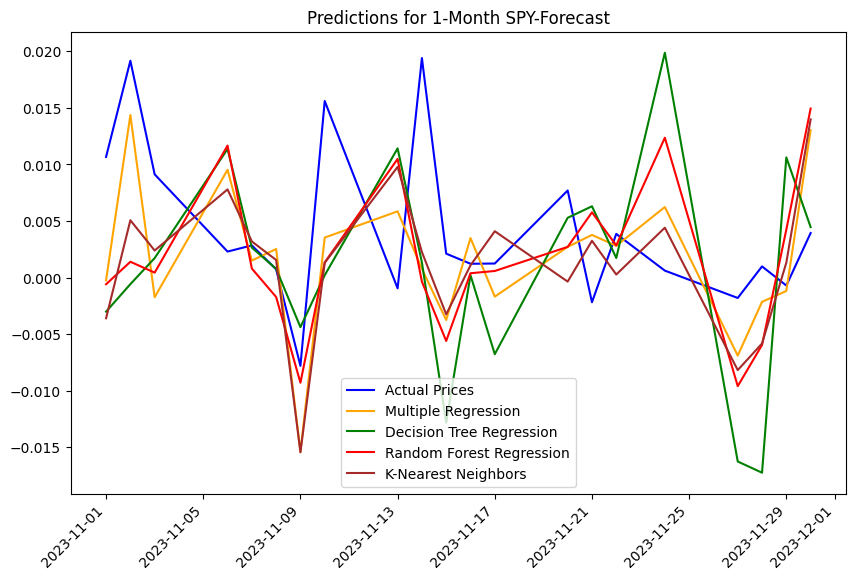


Overall Performance Metrics for 1-Month SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.006119  0.000056  0.007475  -0.176540  224.413784
Decision Tree        0.009530  0.000136  0.011654  -1.859939  550.357460
Random Forest        0.007814  0.000090  0.009473  -0.889394  356.480960
K-NN                 0.006955  0.000071  0.008453  -0.504558  247.231096



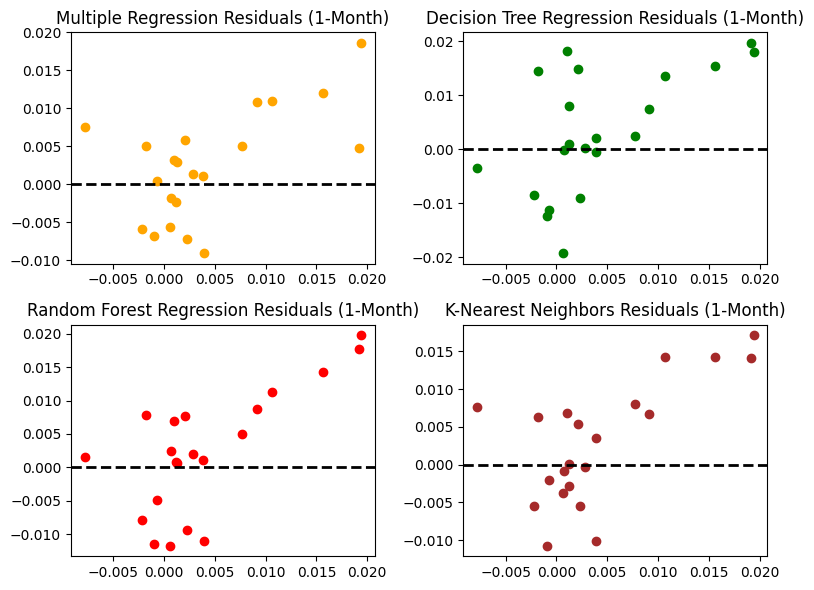


Residual Statistics for 1-Month SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.002426          0.007245
Decision Tree             0.003387          0.011427
Random Forest             0.002439          0.009379
K-NN                      0.002997          0.008099



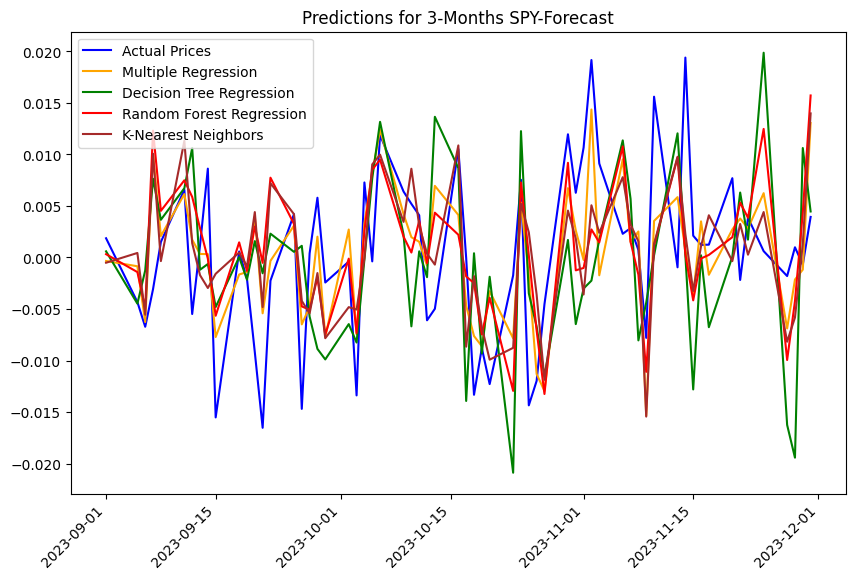


Overall Performance Metrics for 3-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared        MAPE
Multiple Regression  0.005358  0.000044  0.006670   0.319981  361.714180
Decision Tree        0.008575  0.000108  0.010404  -0.654433  859.366539
Random Forest        0.006556  0.000066  0.008094  -0.001406  310.595870
K-NN                 0.006391  0.000061  0.007788   0.072783  526.752684



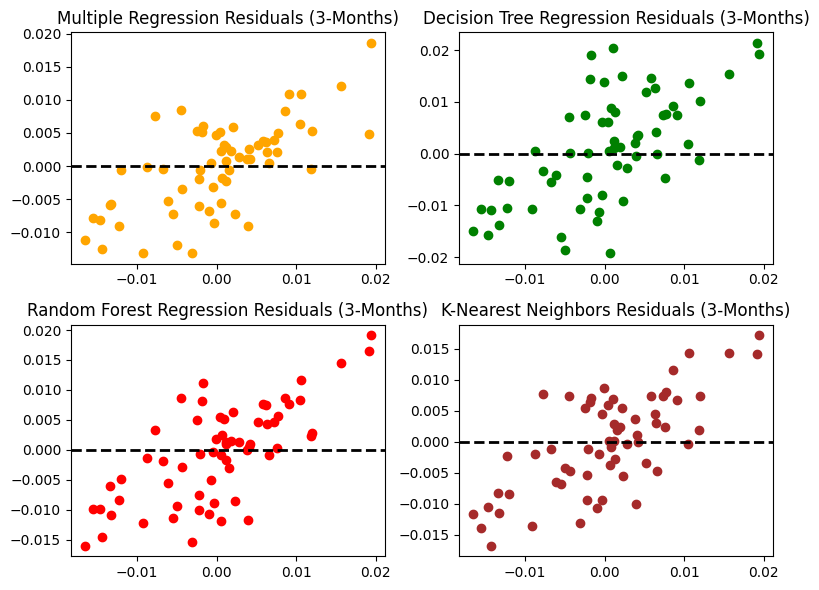


Residual Statistics for 3-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression      -0.000038          0.006723
Decision Tree             0.000902          0.010448
Random Forest            -0.000497          0.008144
K-NN                     -0.000148          0.007850



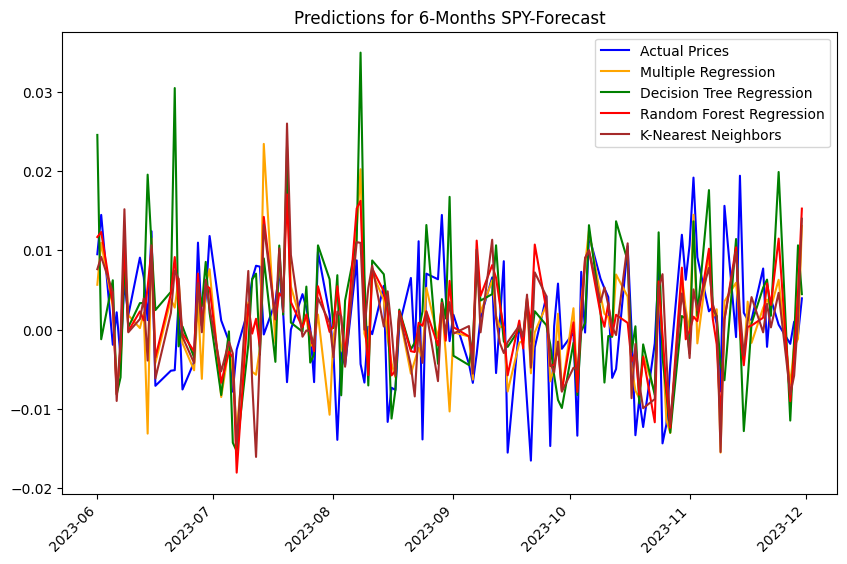


Overall Performance Metrics for 6-Months SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.005948  0.000061  0.007801  -0.099320   inf
Decision Tree        0.007698  0.000106  0.010303  -0.917528   inf
Random Forest        0.006329  0.000065  0.008054  -0.171724   inf
K-NN                 0.006555  0.000071  0.008445  -0.288158   inf



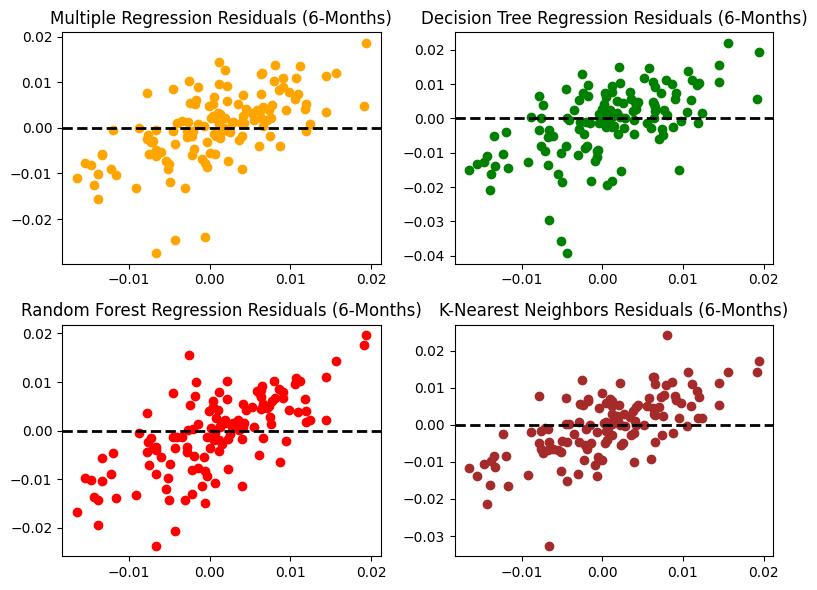


Residual Statistics for 6-Months SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000209          0.007830
Decision Tree            -0.001283          0.010264
Random Forest            -0.000694          0.008056
K-NN                     -0.000241          0.008475



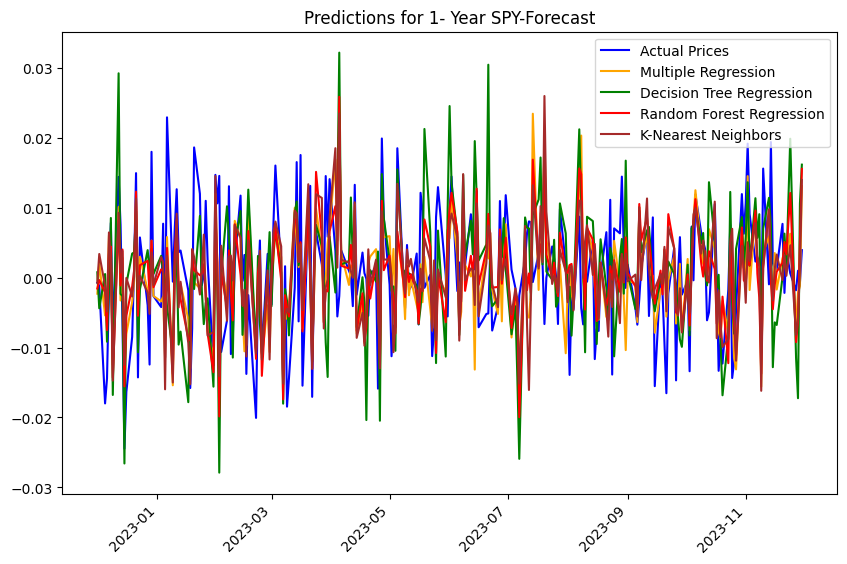


Overall Performance Metrics for 1- Year SPY-Forecast:
                          MAE       MSE      RMSE  R-Squared  MAPE
Multiple Regression  0.006511  0.000069  0.008323   0.103012   inf
Decision Tree        0.007953  0.000107  0.010335  -0.383290   inf
Random Forest        0.006724  0.000071  0.008446   0.076180   inf
K-NN                 0.006875  0.000075  0.008675   0.025541   inf



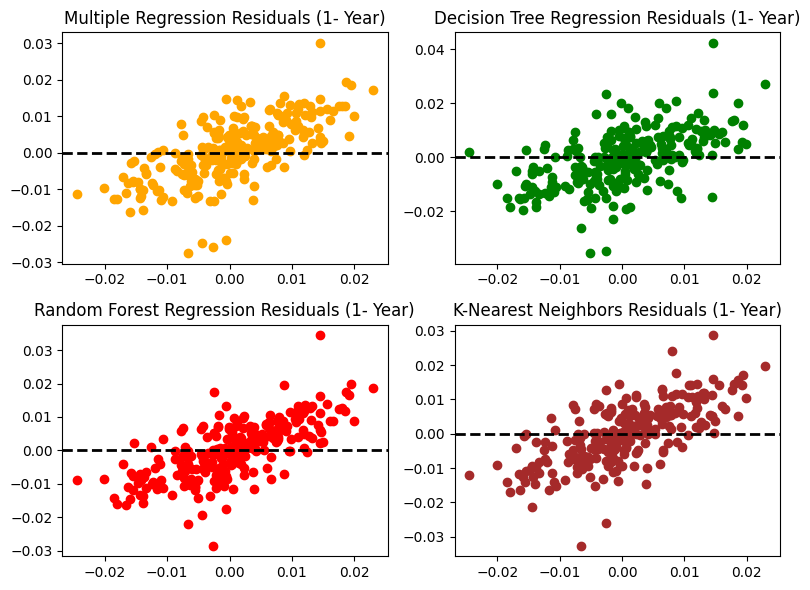


Residual Statistics for 1- Year SPY-Forecast:
                     Mean Residual  Std Dev Residual
Multiple Regression       0.000504          0.008324
Decision Tree            -0.000507          0.010344
Random Forest             0.000137          0.008462
K-NN                      0.000106          0.008691



In [ ]:
#  #Download historical data for SPY
healthcare = ["UNH", "JNJ","LLY", "SPY", "XLV"]
healthcare_data = yf.download(healthcare, start='2000-01-01', end='2023-12-01')["Close"]
healthcare_data = healthcare_data.pct_change()
healthcare_data.dropna(inplace = True)
# spy_data.head()

# Assuming X is your feature matrix
features = ["UNH", "JNJ", "LLY", "XLV"]
X = healthcare_data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Choose based on the plot or a threshold
num_components = 2
X_selected_pca = pd.DataFrame(X_pca[:, :num_components], columns=[f'PC{i+1}' for i in range(num_components)])

X_selected_pca['Date'] = healthcare_data.index

# Set the 'Date' column as the index
X_selected_pca.set_index('Date', inplace=True)

X_selected_pca['SPY'] = healthcare_data["SPY"]


features = ["PC1", "PC2"]
X = X_selected_pca[features]
y = X_selected_pca['SPY']

#List of training end dates
dates = ['2023-11-01', '2023-09-01', '2023-06-01', '2022-12-01']
pred = ['1-Month', '3-Months', '6-Months', '1- Year']
# Create an empty DataFrame to store performance metrics
all_metrics_df = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'])

# Iterate #through each training end date
for train_end_date, i in zip(dates, pred):
    # Train-test split
    X_train = X[X.index < train_end_date]
    y_train = y[y.index < train_end_date]
    X_test = X[X.index >= train_end_date]
    y_test = y[y.index >= train_end_date]

    # Standardize features
    X_train_scaled = X_train
    X_test_scaled = X_test


    # Multiple Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_scaled, y_train)
    dt_predictions = dt_model.predict(X_test_scaled)

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)

    # K-Nearest Neighbors Regression
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train_scaled, y_train)
    knn_predictions = knn_model.predict(X_test_scaled)



    # Calculate metrics for each model
    lr_metrics = calculate_metrics(y_test, lr_predictions)
    dt_metrics = calculate_metrics(y_test, dt_predictions)
    rf_metrics = calculate_metrics(y_test, rf_predictions)
    knn_metrics = calculate_metrics(y_test, knn_predictions)


    # Plotting
    plt.figure(figsize=(10, 6))

    plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
    plt.plot(y_test.index, lr_predictions, label='Multiple Regression', color='orange')
    plt.plot(y_test.index, dt_predictions, label='Decision Tree Regression', color='green')
    plt.plot(y_test.index, rf_predictions, label='Random Forest Regression', color='red')
    plt.plot(y_test.index, knn_predictions, label='K-Nearest Neighbors', color='brown')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Predictions for {i} SPY-Forecast')
    plt.legend()


    plt.show()

    # Compare Performance Metrics
    models = ['Multiple Regression', 'Decision Tree', 'Random Forest','K-NN']
    metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics,knn_metrics],
                          columns=['MAE', 'MSE', 'RMSE', 'R-Squared', 'MAPE'], index=models)

    # Display overall performance metrics
    print(f"\nOverall Performance Metrics for {i} SPY-Forecast:")
    print(f"{metrics_df}\n")


##############################################################################################################################################################################################################################################
### Residual Analysis

    # Calculate residuals for each model
    lr_residuals = y_test - lr_predictions
    dt_residuals = y_test - dt_predictions
    rf_residuals = y_test - rf_predictions
    knn_residuals = y_test - knn_predictions


    # Plot Residuals
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 2, 1)
    plt.scatter(y_test, lr_residuals, color='orange')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Multiple Regression Residuals ({i})')

    plt.subplot(2, 2, 2)
    plt.scatter(y_test, dt_residuals, color='green')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Decision Tree Regression Residuals ({i})')

    plt.subplot(2, 2, 3)
    plt.scatter(y_test, rf_residuals, color='red')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'Random Forest Regression Residuals ({i})')

    plt.subplot(2, 2, 4)
    plt.scatter(y_test, knn_residuals, color='brown')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
    plt.title(f'K-Nearest Neighbors Residuals ({i})')



    plt.tight_layout()
    plt.show()

    # Display Residual Statistics
    residual_stats = pd.DataFrame({
    'Mean Residual': [lr_residuals.mean(), dt_residuals.mean(), rf_residuals.mean(), knn_residuals.mean()],
    'Std Dev Residual': [lr_residuals.std(), dt_residuals.std(), rf_residuals.std(), knn_residuals.std()]
    }, index=models)

    print(f"\nResidual Statistics for {i} SPY-Forecast:")
    print(f"{residual_stats}\n")